In [114]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [3]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [8]:
def linear_dynamics(A, vmin=-1, vmax=1, step=0.1):
    # The mpl streamplot requires the values of x to be equal
    X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
    X_dot = np.einsum("ij,jnm->inm", A, X)
    return X, X_dot

In [9]:
a = -2
A = np.array([[a, 0], [0, -1]])
X, X_dot = linear_dynamics(A)

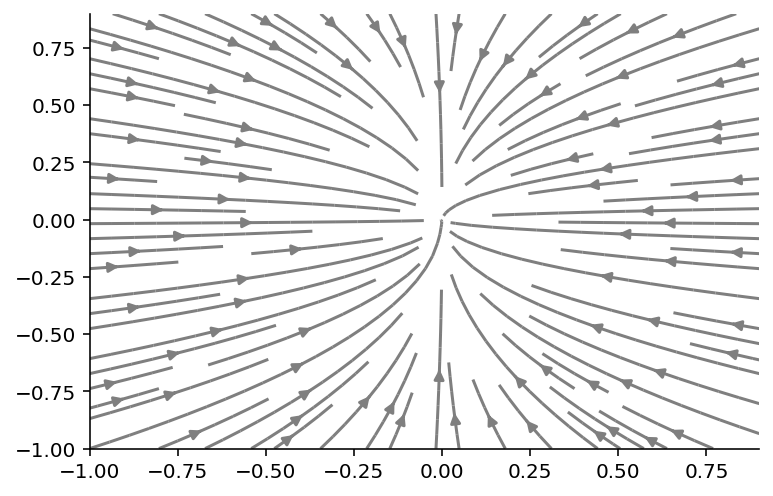

In [10]:
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=1)

In [91]:
a = -2

x0, y0 = -2, 1

def x(t): return x0 * np.exp(a * t)
def y(t): return y0 * np.exp(-t)

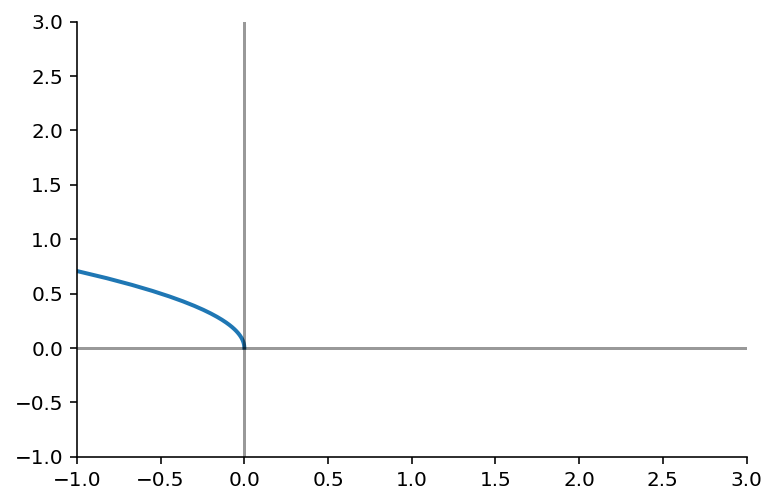

In [92]:
t = np.linspace(-4, 6, 100)
plt.plot(x(t), y(t), linewidth=2)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.axhline(y=0, c="black", alpha=0.4)
plt.axvline(x=0, c="black", alpha=0.4)

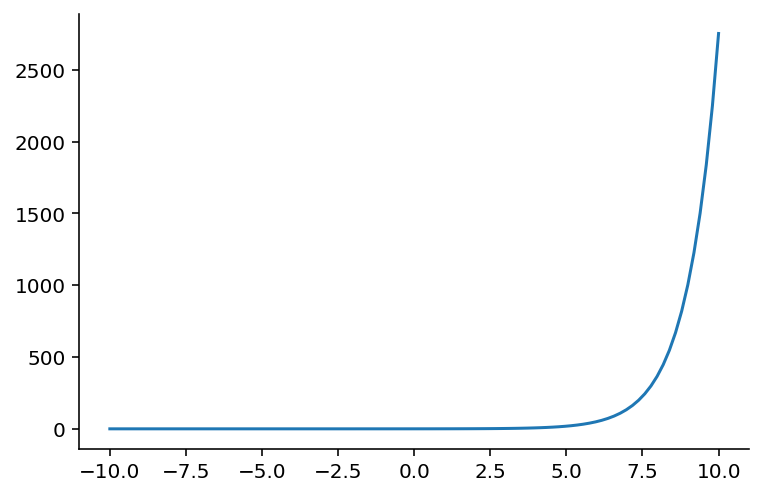

In [102]:
C_prime = y0 / x0
t = np.linspace(-10, 10, 100)
plt.plot(t, C_prime * -y(t) / (a * x(t)))

## Vector Fields

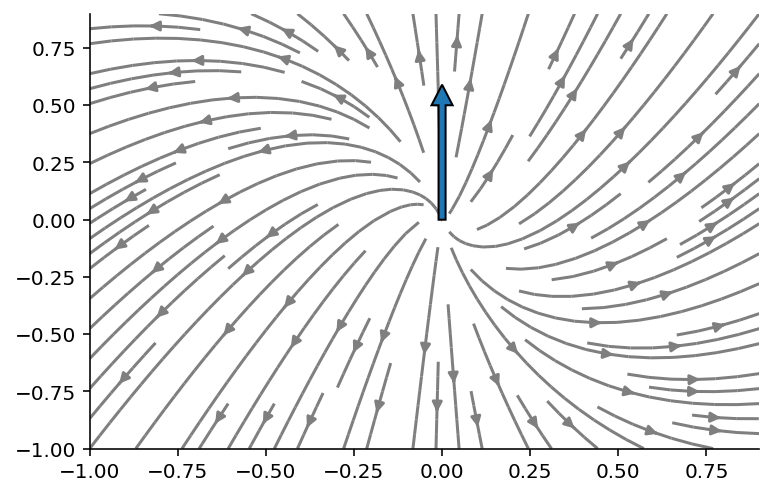

In [171]:
A = np.array([[1, 0], [1, 1]])
X, X_dot = linear_dynamics(A)

plt.streamplot(*X, *X_dot, color="tab:gray", zorder=1)
plt.arrow(0, 0, 0, 0.5, width=0.02)

In [210]:
A = np.array([[0, -1], [-1, 0]])
evals, evecs = eig(A)

In [211]:
evals

array([ 1., -1.])

In [212]:
evecs

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [213]:
Z = np.apply_along_axis(lambda x: x[0] ** 2 - x[1] ** 2, 0, X)

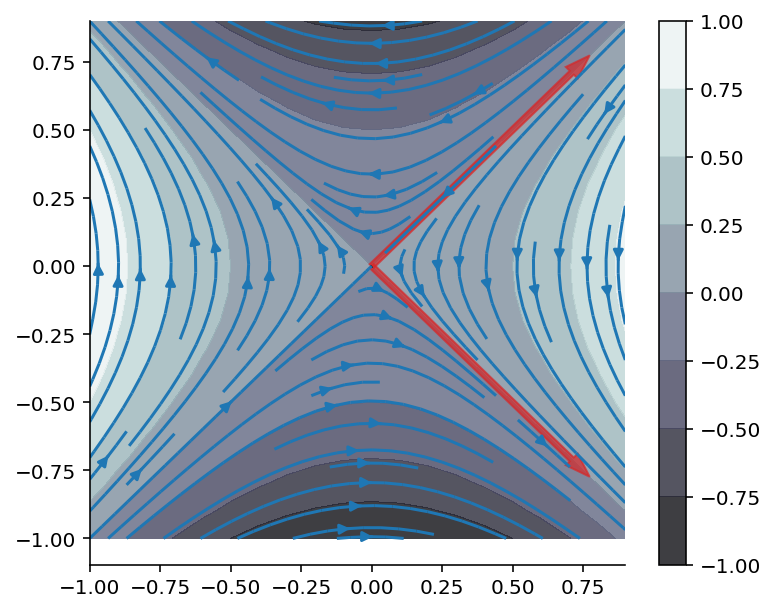

In [214]:
X, X_dot = linear_dynamics(A)

plt.figure(figsize=(6, 5))
plt.streamplot(*X, *X_dot, color="tab:blue", zorder=2)
plt.arrow(0, 0, 0.71, -0.71, width=0.02, color="tab:red", alpha=0.7)
plt.arrow(0, 0, 0.71, 0.71, width=0.02, color="tab:red", alpha=0.7)
plt.contourf(*X, Z, zorder=1, cmap="bone", alpha=0.8)
plt.colorbar()

In [215]:
evals

array([ 1., -1.])

In [216]:
evecs / np.abs(evecs)

array([[ 1.,  1.],
       [-1.,  1.]])

In [217]:
x = np.linspace(-1, 1)
y = x.copy()

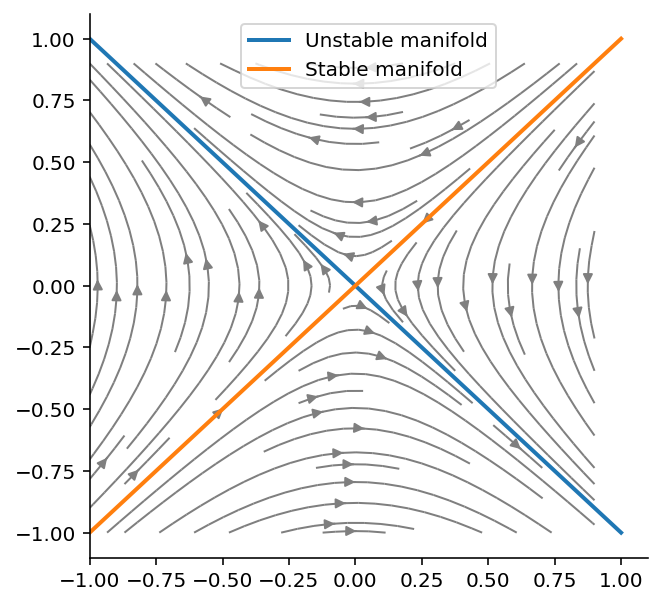

In [218]:
plt.figure(figsize=(5,5))
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=2, linewidth=1)
plt.plot(x, -y, linewidth=2, label="Unstable manifold")
plt.plot(x, y, linewidth=2, label="Stable manifold")
plt.legend()

Change of coordinates

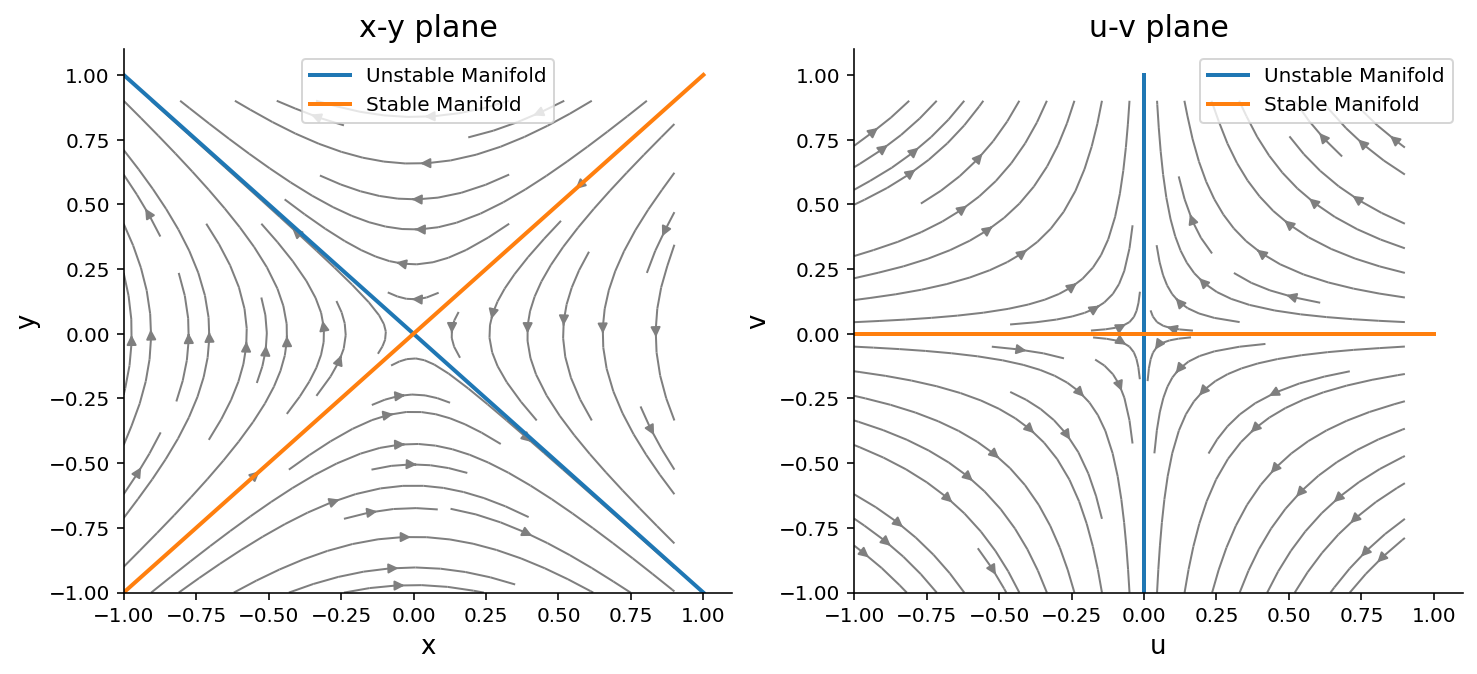

In [245]:
A1 = np.array([[0, -1], [-1, 0]])
A2 = np.array([[-1, 0], [ 0, 1]])
A = A1, A2

x = np.linspace(-1, 1)
y = x.copy()

stable_manifold = (x, y), (x, y - y)
unstable_manifold = (x, -y), (x - x, y)
titles = "x-y plane", "u-v plane"
xlabels = "x", "u"
ylabels = "y", "v"
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

elements = zip(ax, A, xlabels, ylabels, stable_manifold, unstable_manifold, titles)
for axi, Ai, xlab, ylab, stable, unstable, title in elements:
    xstable, ystable = stable
    xunstable, yunstable = unstable
    X, X_dot = linear_dynamics(Ai)
    axi.streamplot(*X, *X_dot, density=0.7, linewidth=1, color="tab:gray")
    axi.set_xlabel(xlab, fontsize=13)
    axi.set_ylabel(ylab, fontsize=13)
    axi.plot(xunstable, yunstable, label="Unstable Manifold", linewidth=2)
    axi.plot(xstable, ystable, label="Stable Manifold", linewidth=2)
    axi.set_title(title, fontsize=15)
    axi.legend()

In [287]:
from matplotlib.collections import LineCollection

In [296]:
segments = np.c_[xt, yt]
segments.shape

(10, 2)

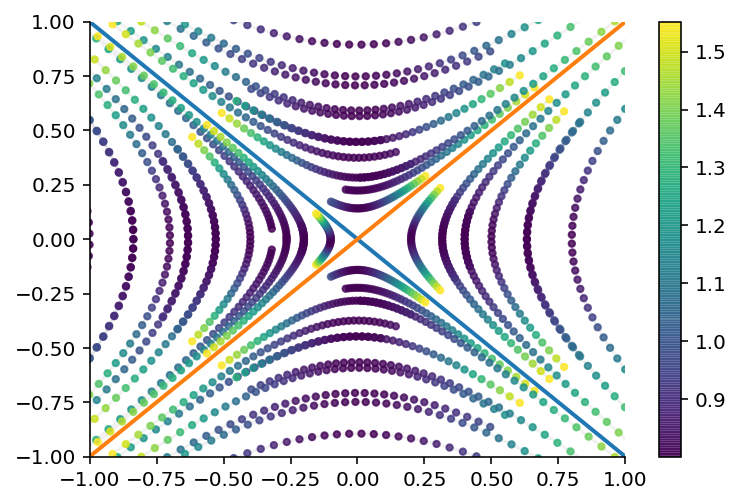

In [316]:
uv_init = np.mgrid[-1:1:0.3, -1:1:0.3]
uv_init = uv_init.T.reshape(-1, 2)

t = np.linspace(-1, 1, 40)
for u0, v0 in uv_init:
    xt = (u0 * np.exp(-t) + v0 * np.exp(t)) / 2
    yt = (u0 * np.exp(-t) - v0 * np.exp(t)) / 2
    c = np.sqrt(xt ** 2 + yt ** 2)

    plt.scatter(xt, yt, s=10, c=c, alpha=0.8, zorder=2)
    plt.plot(xt, yt, c="tab:gray", zorder=1, alpha=0.1)
plt.plot(x, -y, linewidth=2, label="Unstable manifold")
plt.plot(x, y, linewidth=2, label="Stable manifold")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.colorbar();

## Classification of Fixed points

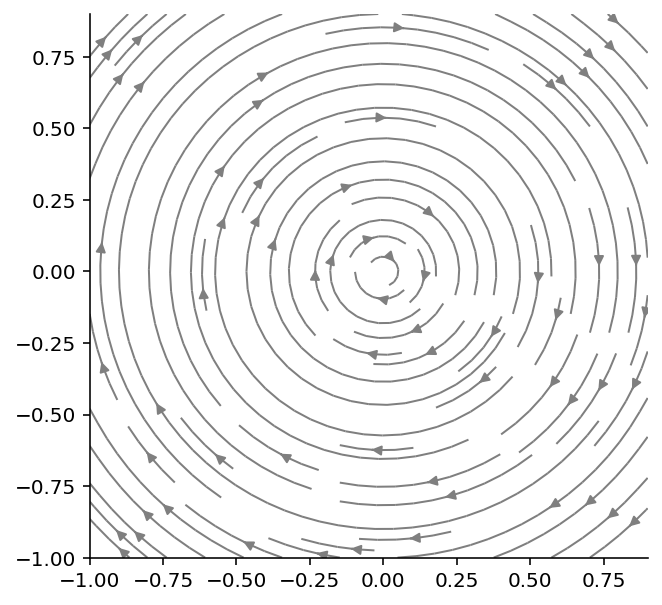

In [323]:
A = np.array([[0, 2], [-2, 0]])
X, X_dot = linear_dynamics(A)
plt.figure(figsize=(5,5))
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=2, linewidth=1)

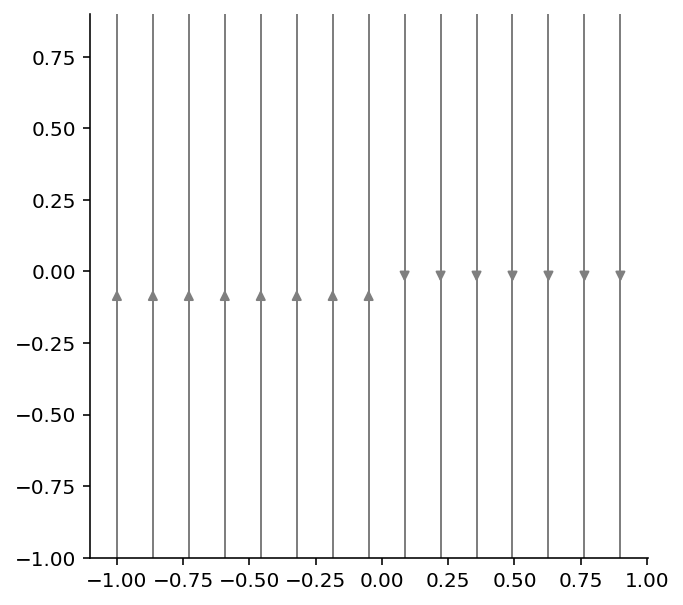

In [329]:
A = np.array([[0, 0], [-4, 0]])
X, X_dot = linear_dynamics(A)
plt.figure(figsize=(5,5))
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=2, linewidth=1, density=0.5)

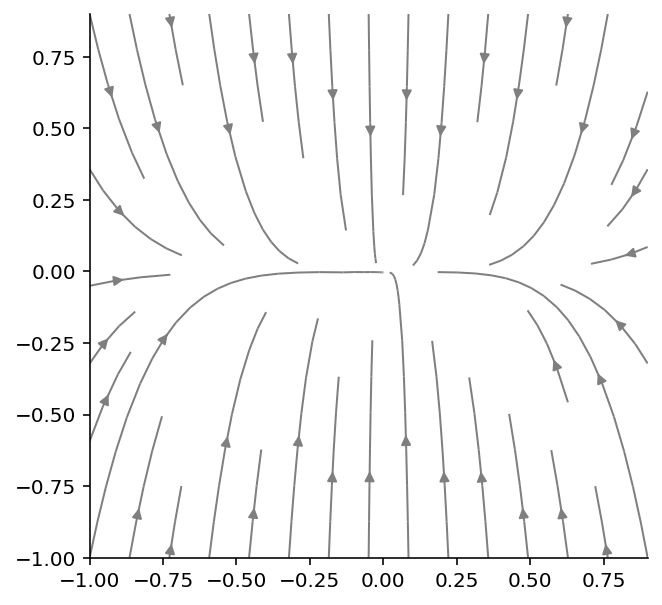

In [330]:
A = np.array([[-1, 0], [0, -5]])
X, X_dot = linear_dynamics(A)
plt.figure(figsize=(5,5))
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=2, linewidth=1, density=0.5)